In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import sys
sys.path.append("D:/ryanh/github/ripple_analyses")
from functions import *

In [ ]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 7,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

https://github.com/neilernst/cliffsDelta

In [29]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size

def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

# load in data

In [18]:
df = pd.read_csv('F:/Projects/PAE_PlaceCell/swr_data/post_processed/swr_df.csv')
df_inter_ripple = pd.read_csv('F:/Projects/PAE_PlaceCell/swr_data/post_processed/swr_inter_ripple_interval.csv')

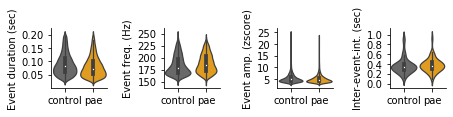

In [65]:
epoch_idx = ((df.ep_type == 'track') | (df.ep_type == 'pedestal_1') | (df.ep_type == 'pedestal_2'))

fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.2, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=1)
axs = axs.ravel()

# set params
x = 'group'
linewidth = 1.25
width = .9

# Create an array with the colors you want to use
colors = ['dimgrey','#ffa500ff']
# colors = ['dimgrey','gold']


# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# plot
axs[0] = sns.violinplot(x=x, y="ripple_duration", data=df[epoch_idx],
               linewidth=linewidth,width=width,ax=axs[0])
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axs[0].set_ylabel('Event duration (sec)')

axs[1] = sns.violinplot(x=x, y="peak_freq", data=df[epoch_idx],
               linewidth=linewidth,width=width,ax=axs[1])
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(25))
axs[1].set_ylabel('Event freq. (Hz)')

axs[2] = sns.violinplot(x=x, y="peak_amplitude", data=df[epoch_idx],
               linewidth=linewidth,width=width,ax=axs[2])
axs[2].yaxis.set_major_locator(ticker.MultipleLocator(5))
axs[2].set_ylabel('Event amp. (zscore)')

epoch_idx = (df_inter_ripple.ep_type == 'track') | (df_inter_ripple.ep_type == 'pedestal_1') | (df_inter_ripple.ep_type == 'pedestal_2')   
axs[3] = sns.violinplot(x=x, y="intra_ripple_interval", data=df_inter_ripple[epoch_idx],
               linewidth=linewidth,width=width,ax=axs[3])
axs[3].yaxis.set_major_locator(ticker.MultipleLocator(0.2))
axs[3].set_ylabel('Inter-event-int. (sec)')

# clean up  box
for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].set_xlabel('')

# fig.text(0.5, -.3, 'Group', ha='center')
plt.savefig('ripple_features_'+epoch+'.svg',dpi=900,bbox_inches='tight')
plt.savefig('ripple_features_'+epoch+'.pdf',dpi=900,bbox_inches='tight')

In [36]:
epoch_idx = ((df.ep_type == 'track') | (df.ep_type == 'pedestal_1') | (df.ep_type == 'pedestal_2'))

print(cliffsDelta(df.ripple_duration[epoch_idx & (df.group == "control")], df.ripple_duration[epoch_idx & (df.group == "pae")]))

print(cliffsDelta(df.peak_freq[epoch_idx & (df.group == "control")], df.peak_freq[epoch_idx & (df.group == "pae")]))

print(cliffsDelta(df.peak_amplitude[epoch_idx & (df.group == "control")], df.peak_amplitude[epoch_idx & (df.group == "pae")]))

epoch_idx = (df_inter_ripple.ep_type == 'track') | (df_inter_ripple.ep_type == 'pedestal_1') | (df_inter_ripple.ep_type == 'pedestal_2')   
print(cliffsDelta(df_inter_ripple.intra_ripple_interval[epoch_idx & (df_inter_ripple.group == "control")],
                  df_inter_ripple.intra_ripple_interval[epoch_idx & (df_inter_ripple.group == "pae")]))

(0.13640916629489874, 'negligible')
(-0.13458831685807301, 'negligible')
(0.11041690494707948, 'negligible')
(-0.11259259259259259, 'negligible')


In [38]:
epoch_idx = df.ep_type == 'track'

print(cliffsDelta(df.ripple_duration[epoch_idx & (df.group == "control")], df.ripple_duration[epoch_idx & (df.group == "pae")]))

print(cliffsDelta(df.peak_freq[epoch_idx & (df.group == "control")], df.peak_freq[epoch_idx & (df.group == "pae")]))

print(cliffsDelta(df.peak_amplitude[epoch_idx & (df.group == "control")], df.peak_amplitude[epoch_idx & (df.group == "pae")]))

epoch_idx = df_inter_ripple.ep_type == 'track'
print(cliffsDelta(df_inter_ripple.intra_ripple_interval[epoch_idx & (df_inter_ripple.group == "control")],
                  df_inter_ripple.intra_ripple_interval[epoch_idx & (df_inter_ripple.group == "pae")]))

(0.18336045539748497, 'small')
(-0.012455909024020769, 'negligible')
(0.14607017058976388, 'negligible')
(0.0196078431372549, 'negligible')


In [39]:
epoch_idx = (df.ep_type == 'pedestal_1') | (df.ep_type == 'pedestal_2')

print(cliffsDelta(df.ripple_duration[epoch_idx & (df.group == "control")], df.ripple_duration[epoch_idx & (df.group == "pae")]))

print(cliffsDelta(df.peak_freq[epoch_idx & (df.group == "control")], df.peak_freq[epoch_idx & (df.group == "pae")]))

print(cliffsDelta(df.peak_amplitude[epoch_idx & (df.group == "control")], df.peak_amplitude[epoch_idx & (df.group == "pae")]))

epoch_idx = (df_inter_ripple.ep_type == 'pedestal_1') | (df_inter_ripple.ep_type == 'pedestal_2')   
print(cliffsDelta(df_inter_ripple.intra_ripple_interval[epoch_idx & (df_inter_ripple.group == "control")],
                  df_inter_ripple.intra_ripple_interval[epoch_idx & (df_inter_ripple.group == "pae")]))

(0.06124051589815099, 'negligible')
(-0.3187182240464496, 'small')
(0.08391646784067518, 'negligible')
(-0.19289940828402366, 'small')


Text(0, 0.5, 'Intra-ripple interval (sec)')

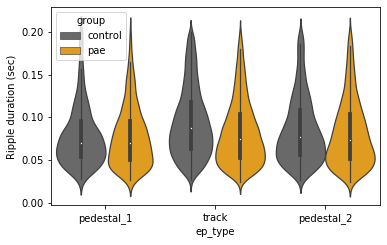

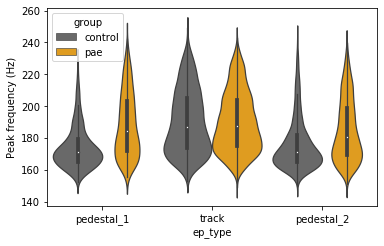

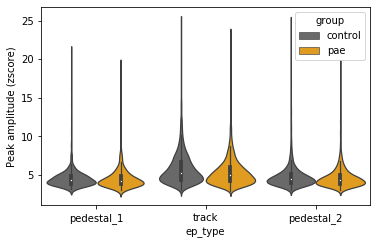

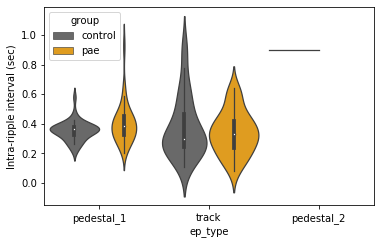

In [57]:
df_temp = df[(df.ep_type == 'track') | (df.ep_type == 'pedestal_1') | (df.ep_type == 'pedestal_2')]

fig, axs = plt.subplots(1,1, figsize=set_size('thesis', fraction=1, subplots=(1, 1)), edgecolor='k')
linewidth = 1.25
width = .9

colors = ['dimgrey','#ffa500ff']
sns.set_palette(sns.color_palette(colors))

ax = sns.violinplot(x="ep_type", y="ripple_duration", hue="group",
                    data=df_temp,linewidth=linewidth,width=width,order=["pedestal_1", "track","pedestal_2"])
ax.set_ylabel('Ripple duration (sec)')

fig, axs = plt.subplots(1,1, figsize=set_size('thesis', fraction=1, subplots=(1, 1)), edgecolor='k')
ax = sns.violinplot(x="ep_type", y="peak_freq", hue="group",
                    data=df_temp,linewidth=linewidth,width=width,order=["pedestal_1", "track","pedestal_2"])
ax.set_ylabel('Peak frequency (Hz)')

fig, axs = plt.subplots(1,1, figsize=set_size('thesis', fraction=1, subplots=(1, 1)), edgecolor='k')
ax = sns.violinplot(x="ep_type", y="peak_amplitude", hue="group",
                    data=df_temp,linewidth=linewidth,width=width,order=["pedestal_1", "track","pedestal_2"])
ax.set_ylabel('Peak amplitude (zscore)')


df_temp = df_inter_ripple[(df_inter_ripple.ep_type == 'track') | 
                          (df_inter_ripple.ep_type == 'pedestal_1') | 
                          (df_inter_ripple.ep_type == 'pedestal_2')]
fig, axs = plt.subplots(1,1, figsize=set_size('thesis', fraction=1, subplots=(1, 1)), edgecolor='k')
ax = sns.violinplot(x="ep_type", y="intra_ripple_interval", hue="group",
                    data=df_temp,linewidth=linewidth,width=width,order=["pedestal_1", "track","pedestal_2"])
ax.set_ylabel('Intra-ripple interval (sec)')

In [61]:
df_temp[df_temp.ep_type == "pedestal_2"]

,Unnamed: 0,session,group,ep_type,intra_ripple_interval,cv
159,159,LS23_S20170508153858,control,pedestal_2,0.9008,0.0
